<a href="https://colab.research.google.com/github/priti7709/r.desc/blob/main/14th_Assignment_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Que 1 - Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

Dataset:- Company data

In [ ]:
 #Import library:-

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import Data:-

In [ ]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
#Data Understanding:-

In [ ]:
#Initial Analysis :-

In [ ]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
company_data.shape

(400, 11)

In [ ]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
company_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
company_data.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [ ]:
#Correlation Matrix :-

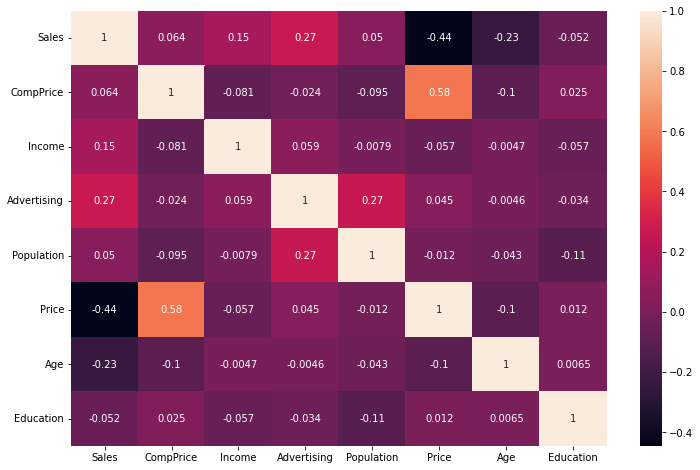

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(company_data.corr(),annot = True)
plt.show()

In [ ]:
# Label Encoder :-

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [ ]:
company_data['ShelveLoc'] = label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = label_encoder.fit_transform(company_data['Urban'])
company_data['US'] = label_encoder.fit_transform(company_data['US'])

In [ ]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


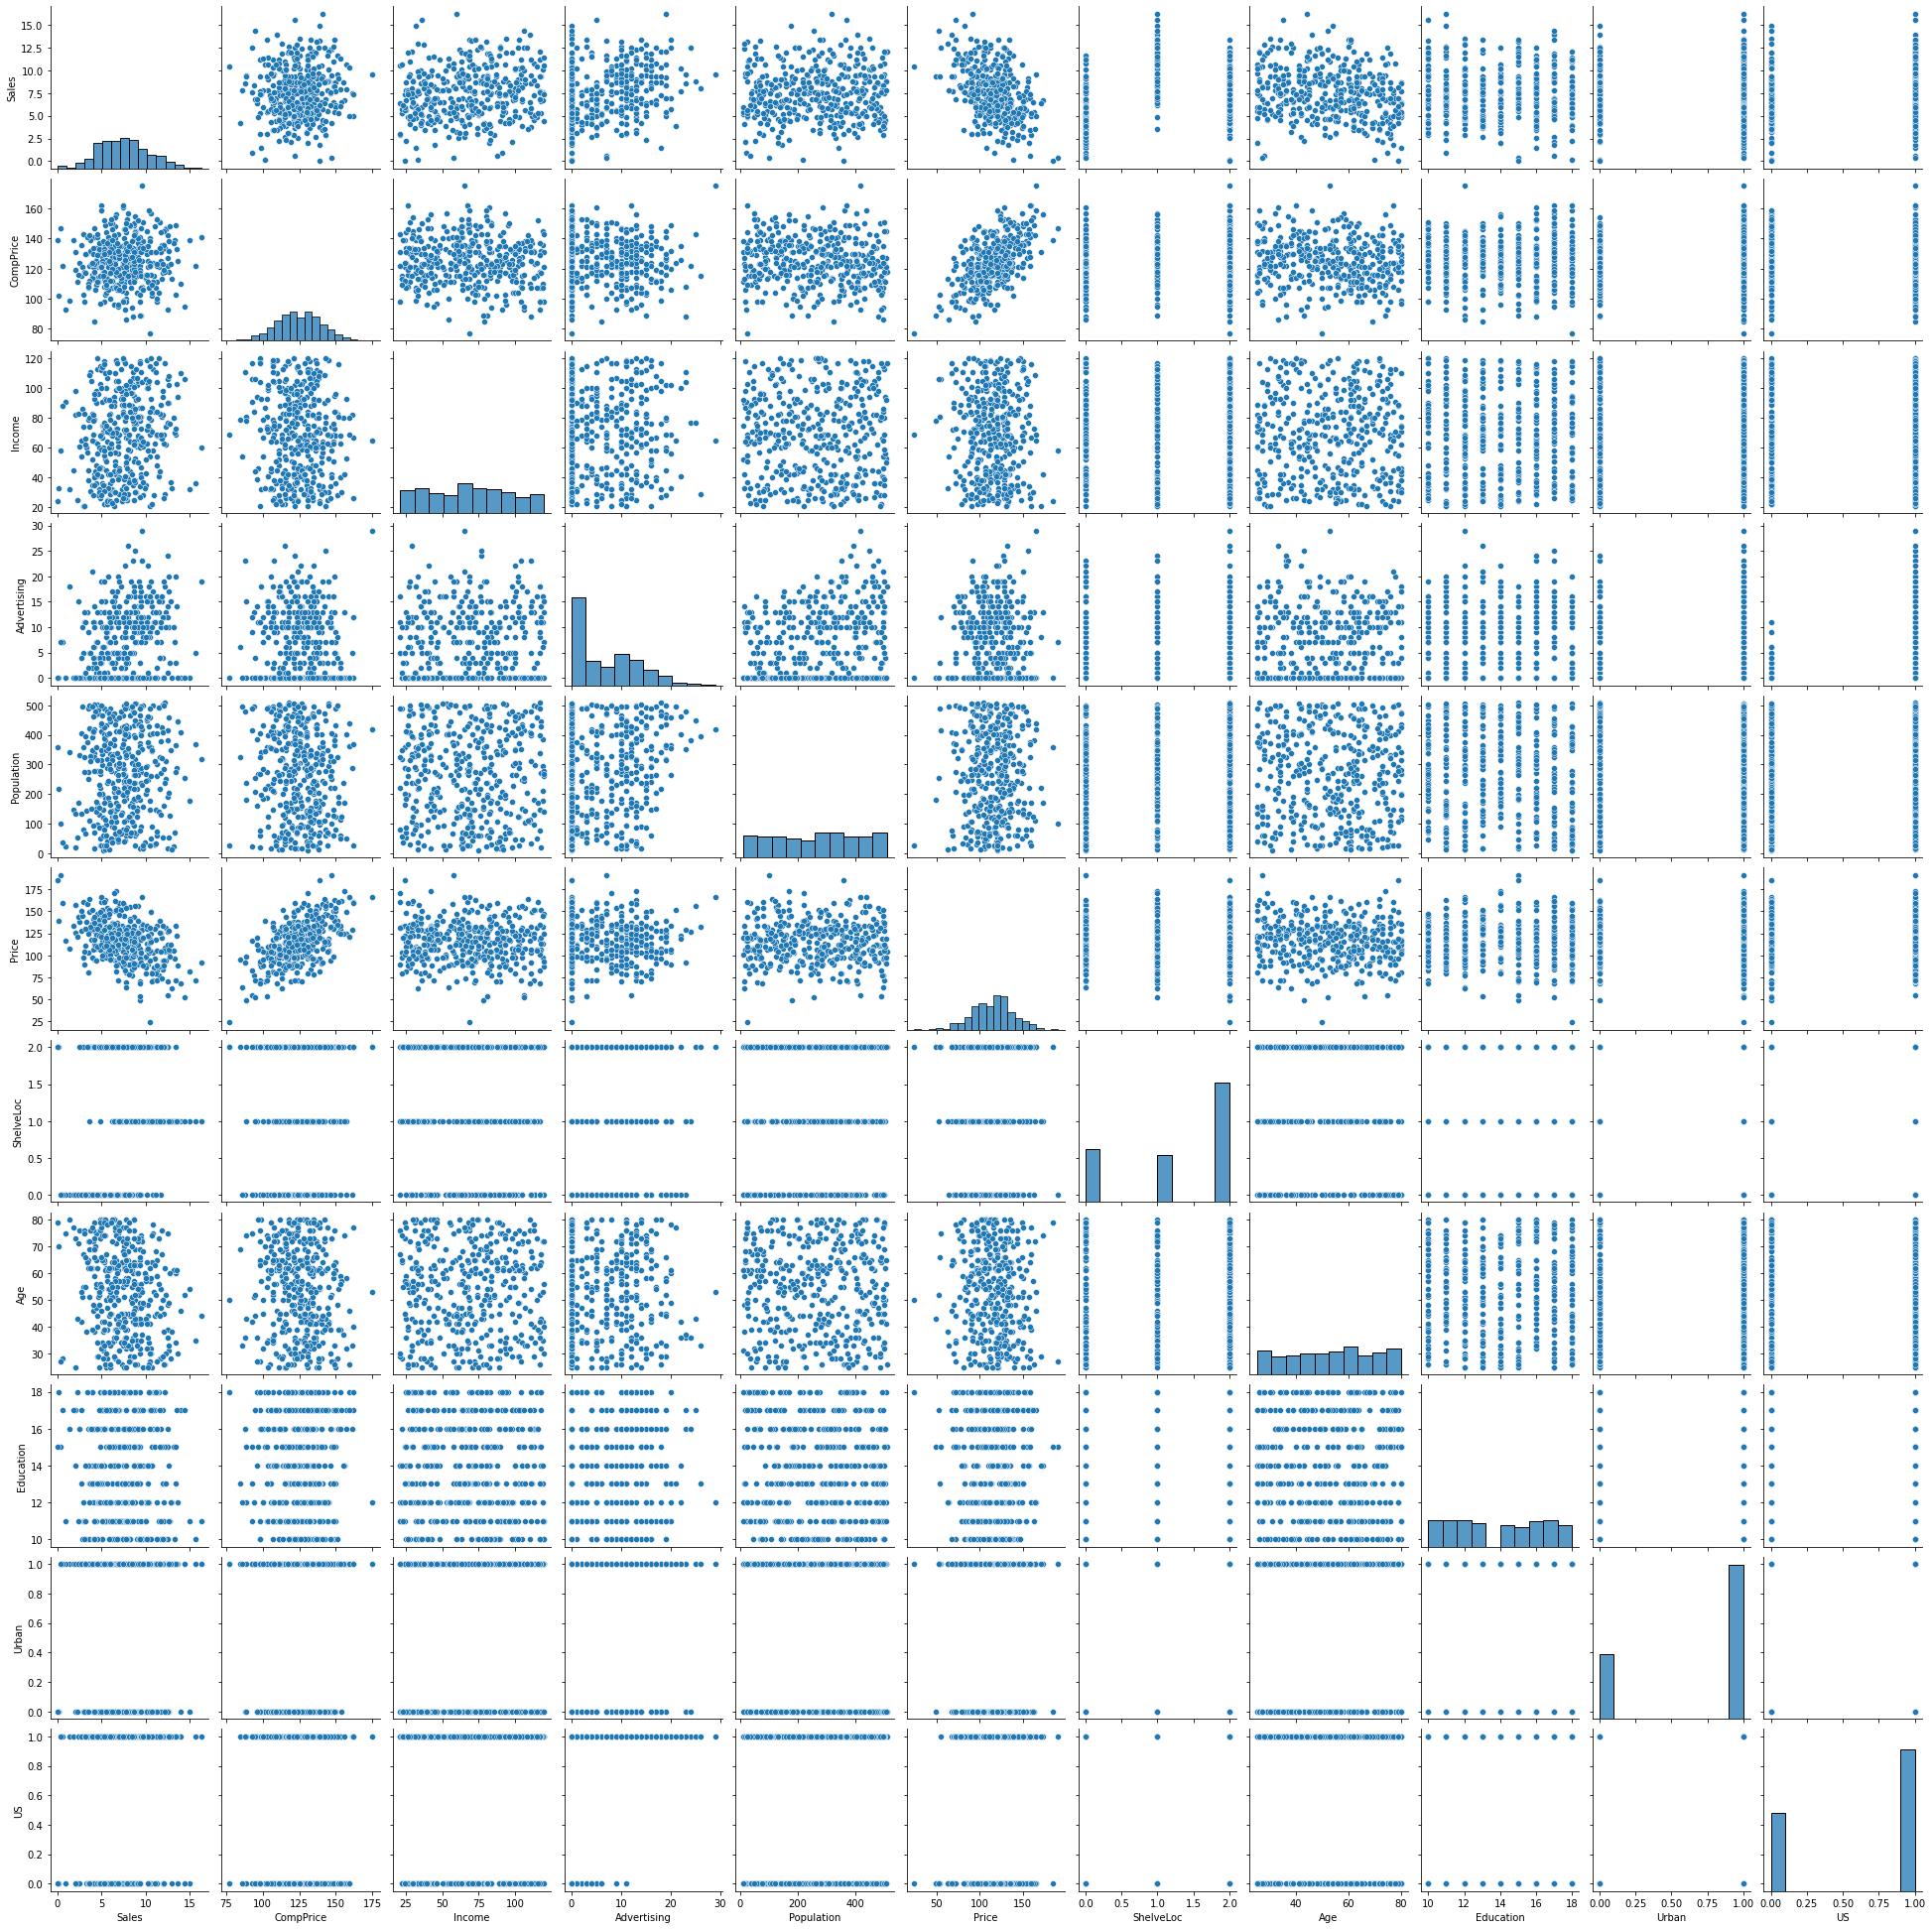

In [ ]:
sns.pairplot(company_data)
plt.show()

In [ ]:
# Train Test Split:-

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = company_data.iloc[:,0:6]
y = company_data['ShelveLoc']

In [ ]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [ ]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [ ]:
company_data['ShelveLoc'].unique()

array([0, 1, 2])

In [ ]:
company_data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [ ]:
list(company_data.columns)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 40) 

 Building Model for Decision Tree Classifier using Entropy Criteria:-

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

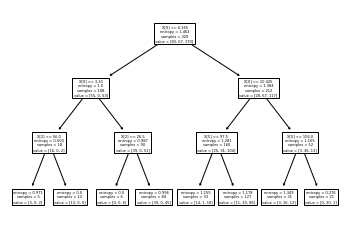

In [ ]:
tree.plot_tree(model);  

In [ ]:
f_n = ['Sales','CompPrice','Income','Advertising','Population','Price']
c_n = ['Bad', 'Good', 'Medium']

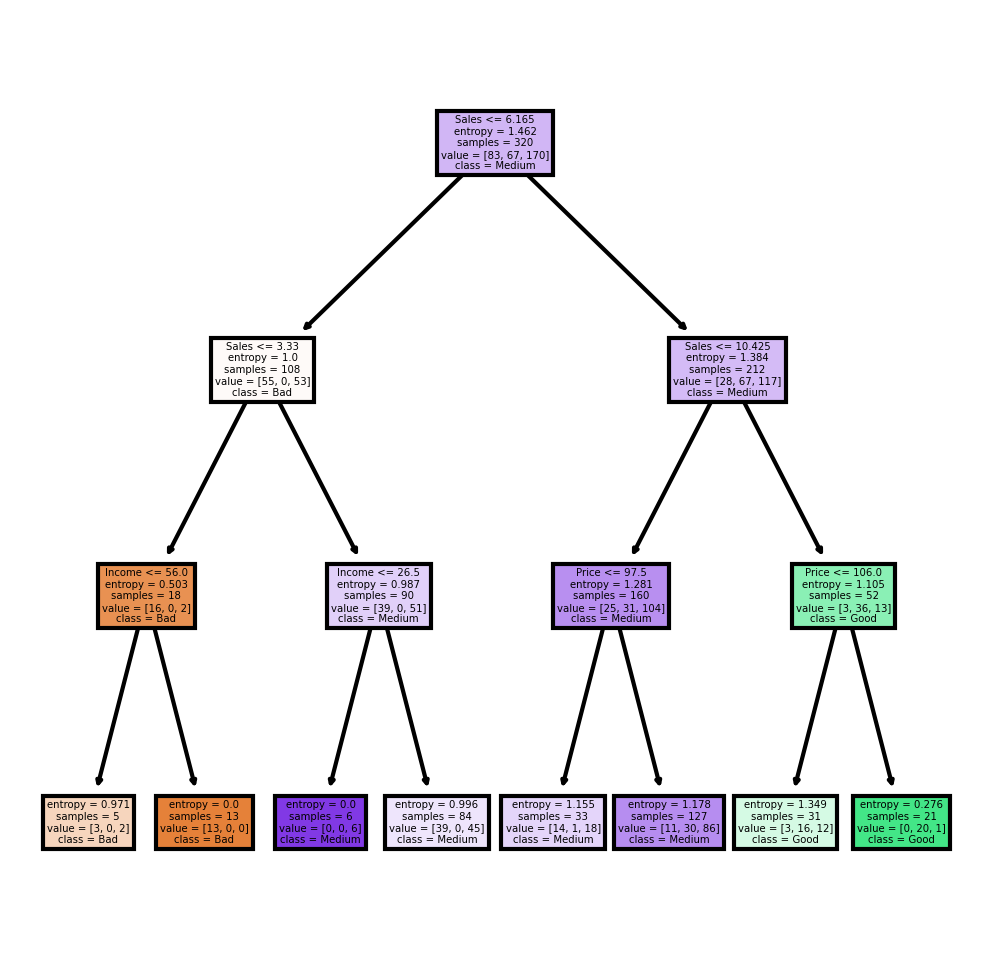

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi = 300)
tree.plot_tree(model,feature_names = f_n,class_names = c_n,filled = True);

In [ ]:
# Predicting on Test Data:-

In [ ]:
prediction = model.predict(x_test)                 
pd.Series(pred).value_counts()  

2    63
1    13
0     4
dtype: int64

In [ ]:
prediction

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [ ]:
pd.crosstab(y_test,pred)

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [ ]:
np.mean(prediction == y_test) 

0.625

In [ ]:
#Feature Importance:-

In [ ]:
model.feature_importances_ 

array([0.74692591, 0.        , 0.06498551, 0.        , 0.        ,
       0.18808858])

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index = f_n).sort_values(ascending = False) 
feature_imp

Sales          0.746926
Price          0.188089
Income         0.064986
CompPrice      0.000000
Advertising    0.000000
Population     0.000000
dtype: float64

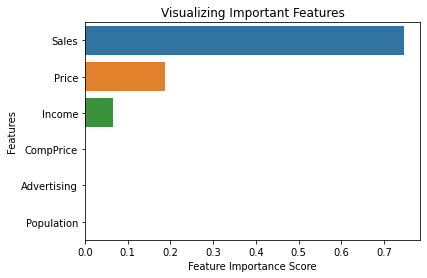

In [ ]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
# Building Model For Decision Tree Classifier (CART) using Gini Criteria:-

In [ ]:
model_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model_1.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

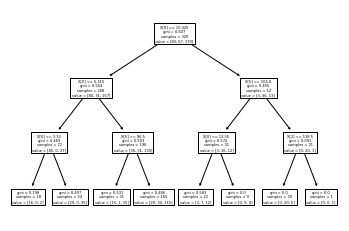

In [ ]:
tree.plot_tree(model_1); 

In [ ]:
f_n = ['Sales','CompPrice','Income','Advertising','Population','Price']
c_n = ['Bad', 'Good', 'Medium']

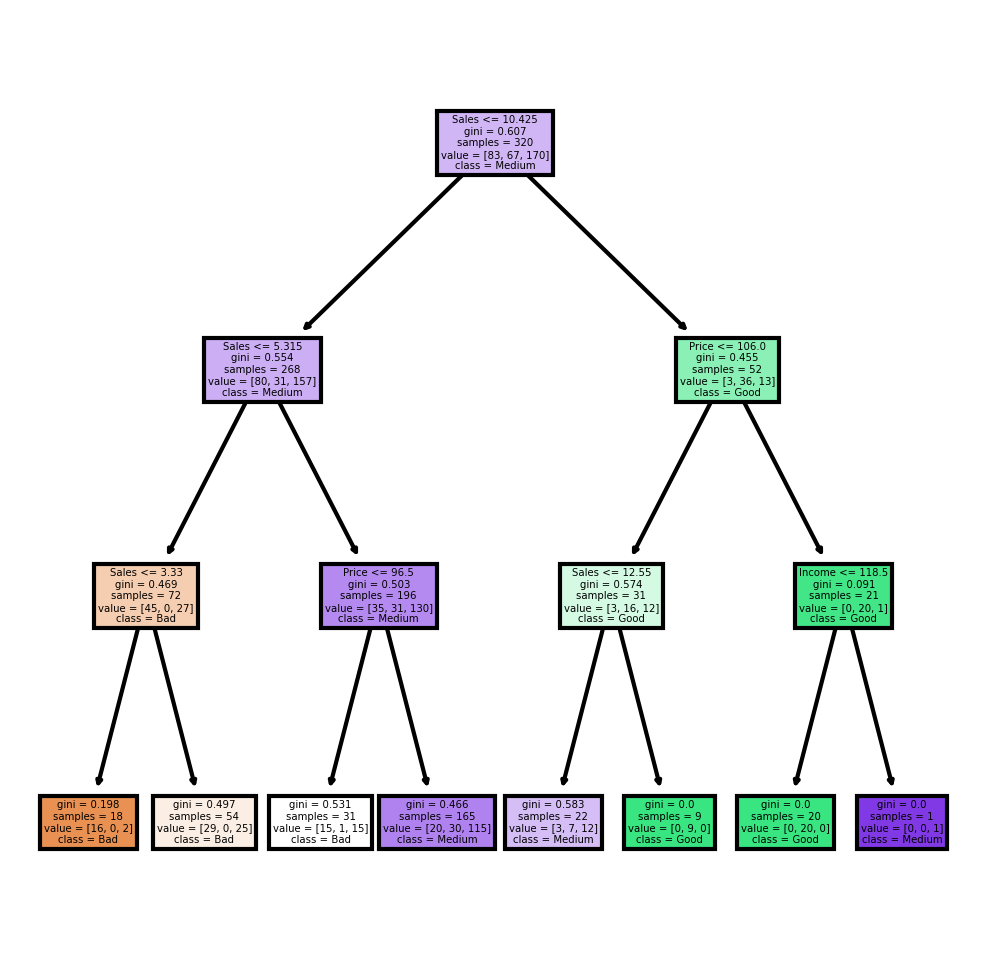

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi = 300)
tree.plot_tree(model_1,feature_names = f_n,class_names = c_n,filled = True);

In [ ]:
#Predicting on Test Data:-

In [ ]:
pred_1 = model_1.predict(x_test)                 
pd.Series(pred_1).value_counts()  

2    42
0    33
1     5
dtype: int64

In [ ]:
pred_1

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2,
       2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2])

In [ ]:
pd.crosstab(y_test,pred_1)

col_0,0,1,2
ShelveLoc,,,
0,8,0,5
1,2,4,12
2,23,1,25


In [ ]:
np.mean(pred_1 == y_test) 

0.4625

In [ ]:
# Feature Importance:-

In [ ]:
model_1.feature_importances_

array([0.80779928, 0.        , 0.03313531, 0.        , 0.        ,
       0.15906541])

In [ ]:
feature_imp_1 = pd.Series(model_1.feature_importances_,index = f_n).sort_values(ascending = False) 
feature_imp_1

Sales          0.807799
Price          0.159065
Income         0.033135
CompPrice      0.000000
Advertising    0.000000
Population     0.000000
dtype: float64

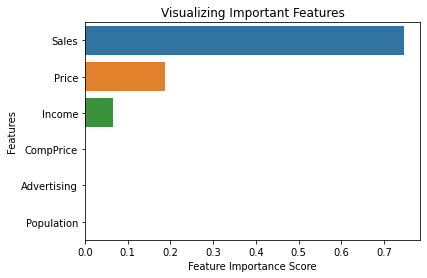

In [ ]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
array = company_data.values
X = array[:,0:6]
y = array[:,3] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1) 

In [ ]:
model_3 = DecisionTreeRegressor()
model_3.fit(X_train, y_train) 

DecisionTreeRegressor()

In [ ]:
model_3.score(X_test,y_test) 

0.9894098230386015

In [ ]:
#Result :
#Model Accuracy for Entropy Criteria :  0.625
#Model Accuracy for Gini Criteria    :  0.4625
#Model Accuracy for Decision Tree Regression : 0.9979

#Que 2 - Use decision trees to prepare a model on fraud data .
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Set - Fraud_check

In [ ]:
#Import library

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import Data:-

In [ ]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
#Data Understanding:-

In [ ]:
#Initial Analysis :

In [ ]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
fraud_data.shape

(600, 6)

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [ ]:
fraud_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [ ]:
fraud_data['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [ ]:
#Correlation Matrix :

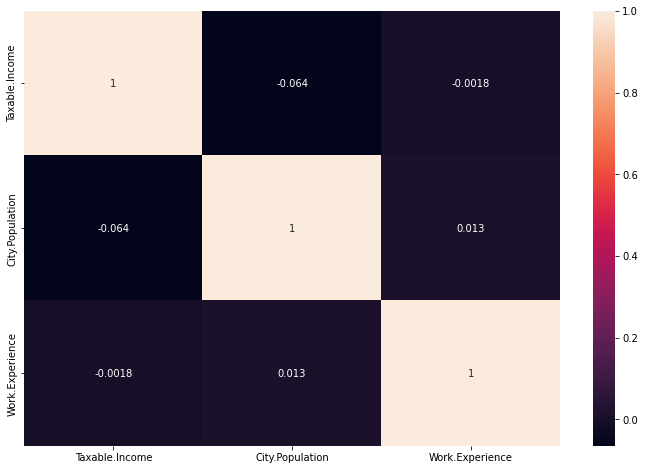

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(fraud_data.corr(),annot = True)
plt.show()

In [ ]:
# Label Encoder :-- 

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [ ]:
fraud_data['Undergrad'] = label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status'] = label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])

In [ ]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


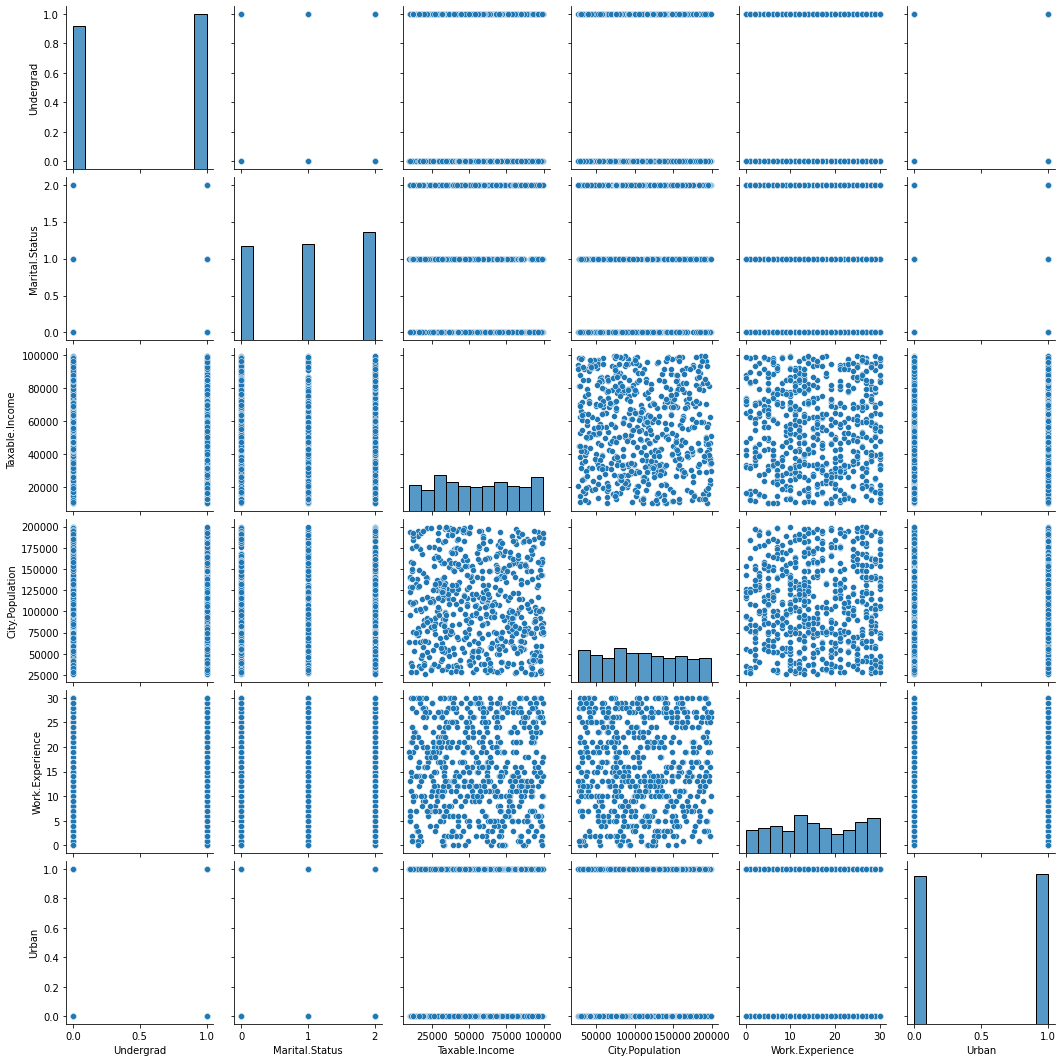

In [ ]:
sns.pairplot(fraud_data)
plt.show()

In [ ]:
# Adding New Column :-

In [ ]:
fraud_data['Status'] = fraud_data['Taxable.Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')
fraud_dada

NameError: ignored

In [ ]:
fraud_data['Status'].unique()

array(['Good', 'Risky'], dtype=object)

In [ ]:
fraud_data['Status'] = label_encoder.fit_transform(fraud_data['Status'])
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [ ]:
# Train Test Split:-

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = fraud_data.iloc[:,0:4]
y = fraud_data['Status']

In [ ]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population
0,0,2,68833,50047
1,1,0,33700,134075
2,0,1,36925,160205
3,1,2,50190,193264
4,0,1,81002,27533
...,...,...,...,...
595,1,0,76340,39492
596,1,0,69967,55369
597,0,0,47334,154058
598,1,1,98592,180083


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Status, Length: 600, dtype: int64

In [ ]:
fraud_data['Status'].unique()

array([0, 1])

In [ ]:
fraud_data.Status.value_counts()

0    476
1    124
Name: Status, dtype: int64

In [ ]:
list(fraud_data.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Status']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 40) 

 Building Model for Decision Tree Classifier using Entropy Criteria:-

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

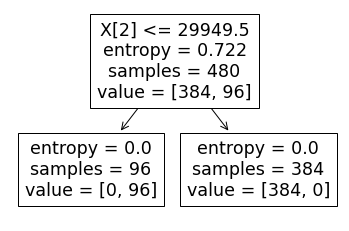

In [ ]:
tree.plot_tree(model);  

In [ ]:
f_n = ['Undergrad','Marital.Status','Taxable.Income','City.Population']
c_n = ['Good', 'Risky']

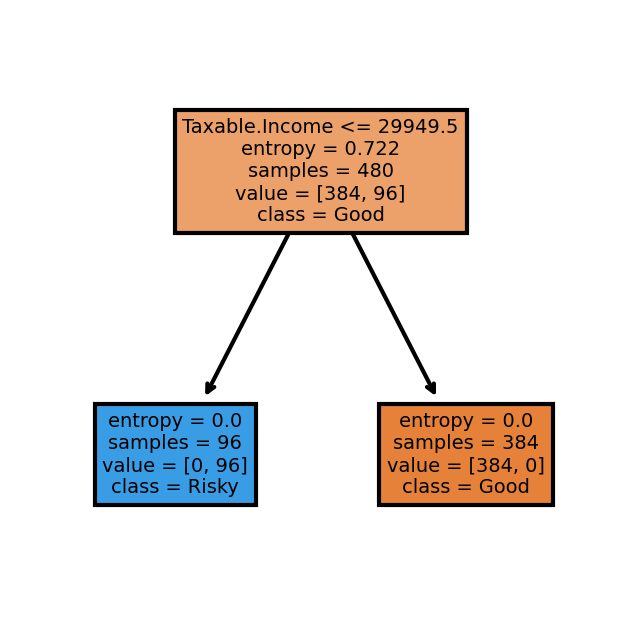

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2.5,2.5), dpi = 300)
tree.plot_tree(model,feature_names = f_n,class_names = c_n,filled = True);

In [ ]:
# Predicting on Test Data:-

In [ ]:
pred = model.predict(x_test)                 
pd.Series(pred).value_counts()  

0    92
1    28
dtype: int64

In [ ]:
pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
pd.crosstab(y_test,pred)

col_0,0,1
Status,,
0,92,0
1,0,28


In [ ]:
np.mean(pred == y_test) 

1.0

In [ ]:
# Feature Importance:-

In [ ]:
model.feature_importances_ 

array([0., 0., 1., 0.])

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index = f_n).sort_values(ascending = False) 
feature_imp

Taxable.Income     1.0
Undergrad          0.0
Marital.Status     0.0
City.Population    0.0
dtype: float64

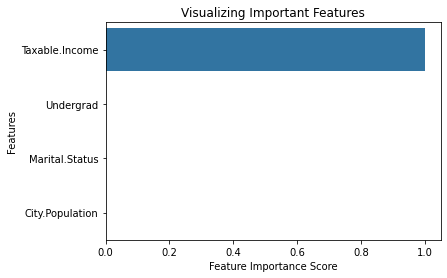

In [ ]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

 Building Model For Decision Tree Classifier (CART) using Gini Criteria:-

In [ ]:
model_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model_1.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

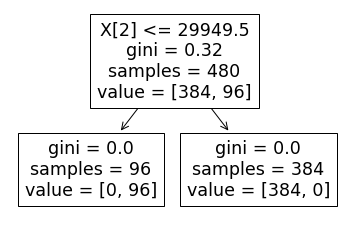

In [ ]:
tree.plot_tree(model_1); 

In [ ]:
f_n = ['Undergrad','Marital.Status','Taxable.Income','City.Population']
c_n = ['Good', 'Risky']

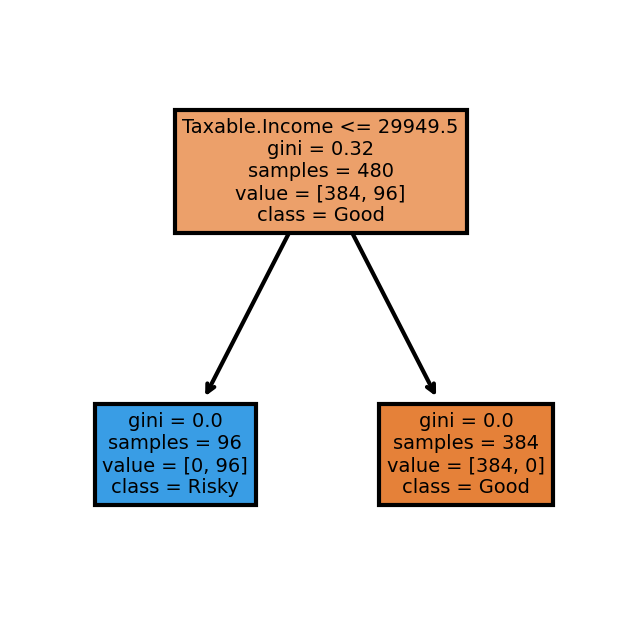

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2.5,2.5), dpi = 300)
tree.plot_tree(model_1,feature_names = f_n,class_names = c_n,filled = True);

In [ ]:
# Predicting on Test Data:-

In [ ]:
pred_1 = model_1.predict(x_test)                 
pd.Series(pred_1).value_counts()  

0    92
1    28
dtype: int64

In [ ]:
pred_1

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
pd.crosstab(y_test,pred_1)

col_0,0,1
Status,,
0,92,0
1,0,28


In [ ]:
np.mean(pred_1 == y_test) 

1.0

In [ ]:
# Feature Importance:-

In [ ]:
model_1.feature_importances_

array([0., 0., 1., 0.])

In [ ]:
feature_imp_1 = pd.Series(model_1.feature_importances_,index = f_n).sort_values(ascending = False) 
feature_imp_1

Taxable.Income     1.0
Undergrad          0.0
Marital.Status     0.0
City.Population    0.0
dtype: float64

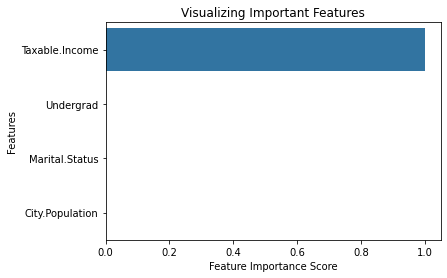

In [ ]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
# Decision Tree Regression:-

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
array = fraud_data.values
X = array[:,0:6]
y = array[:,3] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [ ]:
model_3 = DecisionTreeRegressor()
model_3.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
model_3.score(X_test,y_test) 

0.9998428084893061

In [ ]:
#Result :
# Model Accuracy for Entropy Criteria :  1.0
# Model Accuracy for Gini Criteria    :  1.0
# Model Accuracy for Decision Tree Regression : 0.999